최종적으로 하고자 하는것 = '다음 분기'에 어떤 게임을 만들거임?

필수적으로 들어가야 하는 내용 

1. 지역에 따라 선호하는 장르가 있는가?
2. 연도별로 게임의 트렌드가 있는가?
3. 출고량이 높은 게임에 대해 분석하고 시각화 프로세스를 만들어라

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
upload = files.upload()

Saving vgames2.csv to vgames2.csv


In [4]:
df = pd.read_csv('vgames2.csv')

In [5]:
def unittrans(x):
    if 'K' in x:
        x = x.replace('K', '')
        return (float(x)/1000)
    else :
        x = x.replace('M', '')
        return float(x)                                                            # 입력값 중 K가 있으면 K를 삭제하고 플롯형태에서 1000을 나누고
                                                                                   # 아니라면 M을 찾아서 삭제하고 플롯형태로 반환해라

In [6]:
def transyear(x):                                                                  # 년도에 기입된 2자리 숫자나 0 값들을 고치기 위해서 만든 함수
    if int(x) < 100 and int(x) >= 50 :                                             # 입력값이 100보다 작으면서 50보다는 크거나 같으면 입력값에 1900을 더함 // 50보다 큰 2자리수는 -> 1900년도로
        return int(x) + 1900

    elif int(x) < 50 or int(x) == 0 :                                              # 입력값이 50보다 작거나 0이면 입력값에 2000을 더함 // 50보다 작은 2자리수 이거나 0은 -> 2000년도로
        return int(x) + 2000       

    else :                                                                         # 두개다 해당이 안되면 원래값을 정수형태로 반환해라 // 원래 4자리인 숫자는 정수형으로만 반환
        return int(x)

In [7]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)                                        # 결측치 삭제, 인덱스 초기화

In [8]:
df['NA_Sales'] = df['NA_Sales'].apply(unittrans)
df['EU_Sales'] = df['EU_Sales'].apply(unittrans)
df['JP_Sales'] = df['JP_Sales'].apply(unittrans)
df['Other_Sales'] = df['Other_Sales'].apply(unittrans)

df['Year'] = df['Year'].astype(int)                                                # df의 'Year'컬럼의 타입을 정수로 바꾸고 위서 만들어 둔 transyear 함수를 df의 'Year' 컬럼에 적용시킴
df['Year'] = df['Year'].apply(transyear)

In [9]:
df1 = df.copy()
df10up = df1[(df1['Year'] >= 2010)].reset_index(drop = True) 
df0009 = df1[(df1['Year'] >= 2000) & (df1['Year'] < 2010)].reset_index(drop = True)
df9099 = df1[(df1['Year'] >= 1990) & (df1['Year'] < 2000)].reset_index(drop = True)
df8089 = df1[(df1['Year'] >= 1980) & (df1['Year'] < 1990)].reset_index(drop = True)

                                                                                   # 10년 단위로 4파트로 분리함

In [10]:
df1.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [11]:
jrpg = df1[(df1['Genre'] == 'Role-Playing')]
jrpg.sort_values(by = 'JP_Sales', ascending = False, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
jrpg.head(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7673,7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
9233,9417,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71
10345,10556,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37
10410,10622,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82
10698,10918,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50
1817,1848,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00
5107,5219,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009,Role-Playing,Nintendo,0.66,0.69,4.35,0.15
4437,4535,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.57,4.13,0.34
160,164,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,0.20,0.14,4.10,0.02
14817,15144,Dragon Warrior III,NES,1988,Role-Playing,Enix Corporation,0.10,0.00,3.77,0.00


In [13]:
a = df1[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]                      # 나라별 출고량 합계를 위해서 미리 설정

In [14]:
genre_total_sum = df.groupby(['Genre']).agg({'NA_Sales' : 'sum','EU_Sales' : 'sum',	'JP_Sales' : 'sum',	'Other_Sales' : 'sum'})
genre_total_sum['Total Sum'] = genre_total_sum.sum(axis=1)
genre_total_sum.sort_values(by = 'Total Sum', ascending = False, inplace = True)

total_sum_na = genre_total_sum.sort_values(by = 'NA_Sales', ascending = False)
total_sum_eu = genre_total_sum.sort_values(by = 'EU_Sales', ascending = False)
total_sum_jp = genre_total_sum.sort_values(by = 'JP_Sales', ascending = False)
total_sum_ot = genre_total_sum.sort_values(by = 'Other_Sales', ascending = False)

                                                                                   # 출고량 총합 추가후 내림정렬
                                                                                   # 혹시 필요할까 싶어 미리 4개 분할저장

In [15]:
genre_total_sum_10up = df10up.groupby(['Genre']).agg({'NA_Sales' : 'sum','EU_Sales' : 'sum',	'JP_Sales' : 'sum',	'Other_Sales' : 'sum'})
genre_total_sum_0009 = df0009.groupby(['Genre']).agg({'NA_Sales' : 'sum','EU_Sales' : 'sum',	'JP_Sales' : 'sum',	'Other_Sales' : 'sum'})
genre_total_sum_9099 = df9099.groupby(['Genre']).agg({'NA_Sales' : 'sum','EU_Sales' : 'sum',	'JP_Sales' : 'sum',	'Other_Sales' : 'sum'})
genre_total_sum_8089 = df8089.groupby(['Genre']).agg({'NA_Sales' : 'sum','EU_Sales' : 'sum',	'JP_Sales' : 'sum',	'Other_Sales' : 'sum'})


genre_total_sum_10up['Total Sum'] = genre_total_sum_10up.sum(axis=1)
genre_total_sum_10up.sort_values(by = 'Total Sum', ascending = False, inplace = True)
genre_total_sum_0009['Total Sum'] = genre_total_sum_0009.sum(axis=1)
genre_total_sum_0009.sort_values(by = 'Total Sum', ascending = False, inplace = True)
genre_total_sum_9099['Total Sum'] = genre_total_sum_9099.sum(axis=1)
genre_total_sum_9099.sort_values(by = 'Total Sum', ascending = False, inplace = True)
genre_total_sum_8089['Total Sum'] = genre_total_sum_8089.sum(axis=1)
genre_total_sum_8089.sort_values(by = 'Total Sum', ascending = False, inplace = True)

                                                                                   # 10년 단위 4파트로 분리한 나라별 장르합계
                                                                                   # 4파트로 나눈것들 출고량 총합 추가후 내림정렬

In [16]:
df2 = df.copy()
df2 = df2[['Name','Genre', 'Platform', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df2['Total Sum'] = a.sum(axis=1)
df2.sort_values(by = 'Total Sum', ascending = False, inplace = True)               # 출고량이 높은 게임이 단일 게임하나를 이야기 하는것인지 장르를 이야기 하는것인지 모호하기에
                                                                                   # 이름, 장르를 포함한 새로운 df를 생성하고 나라별 출고량 합계량을 추가하고 출고합계량으로 내림차순 정렬

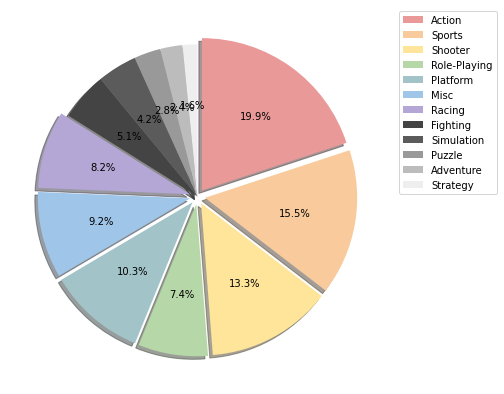

In [17]:
plt.figure(figsize=(7,7))
plt.pie(
        genre_total_sum['NA_Sales'],
        startangle = 90,
        counterclock = False,
        autopct = '%.1f%%',
        explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0, 0, 0, 0, 0],
        shadow = True,
        colors = ['#ea9999', '#f9cb9c', '#ffe599', '#b6d7a8', '#a2c4c9', '#9fc5e8', '#b4a7d6','#444444', '#5b5b5b', '#999999','#bcbcbc', '#eeeeee']
        )
plt.legend(genre_total_sum.index, bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

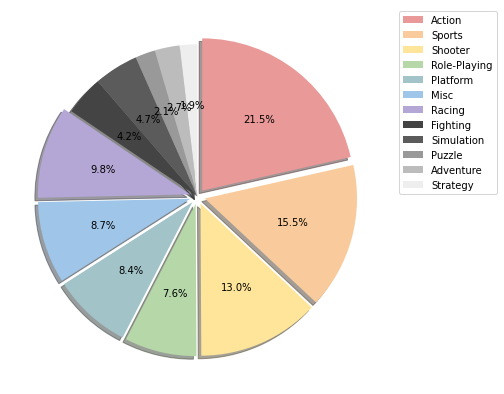

In [18]:
plt.figure(figsize=(7,7))
plt.pie(
        genre_total_sum['EU_Sales'],
        startangle = 90,
        counterclock = False,
        autopct = '%.1f%%',
        explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0, 0, 0, 0, 0],
        shadow = True,
        colors = ['#ea9999', '#f9cb9c', '#ffe599', '#b6d7a8', '#a2c4c9', '#9fc5e8', '#b4a7d6','#444444', '#5b5b5b', '#999999','#bcbcbc', '#eeeeee']
        )
plt.legend(genre_total_sum.index, bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

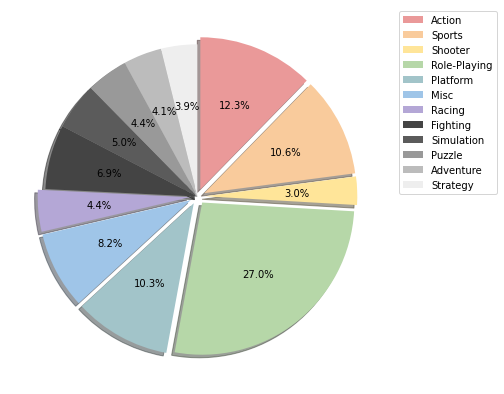

In [19]:
plt.figure(figsize=(7,7))
plt.pie(
        genre_total_sum['JP_Sales'],
        startangle = 90,
        counterclock = False,
        autopct = '%.1f%%',
        explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0, 0, 0, 0, 0],
        shadow = True,
        colors = ['#ea9999', '#f9cb9c', '#ffe599', '#b6d7a8', '#a2c4c9', '#9fc5e8', '#b4a7d6','#444444', '#5b5b5b', '#999999','#bcbcbc', '#eeeeee']
        )
plt.legend(genre_total_sum.index, bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

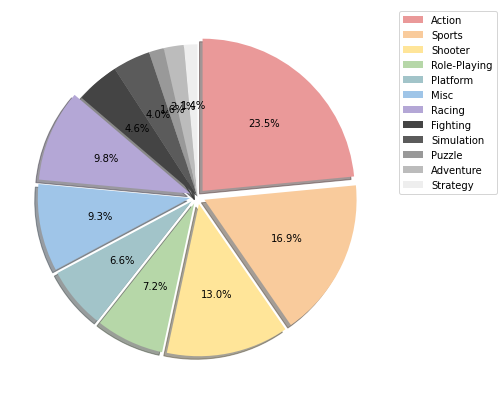

In [20]:
plt.figure(figsize=(7,7))
plt.pie(
        genre_total_sum['Other_Sales'],
        startangle = 90,
        counterclock = False,
        autopct = '%.1f%%',
        explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0, 0, 0, 0, 0],
        shadow = True,
        colors = ['#ea9999', '#f9cb9c', '#ffe599', '#b6d7a8', '#a2c4c9', '#9fc5e8', '#b4a7d6','#444444', '#5b5b5b', '#999999','#bcbcbc', '#eeeeee']
        )
plt.legend(genre_total_sum.index, bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

In [21]:
yeargenre_sum = df2.groupby(['Year','Genre']).agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum'}) # 연도별, 장르별 판매량
yeargenre_sum.drop([2017, 2020], axis = 0, inplace = True)  # 17년 20년도 자료량이 너무 작아 삭제
y_g_sales = yeargenre_sum.reset_index(drop=False)       # 연도별 장르구분 판매량 멀티인덱스 해제


y_act = y_g_sales[(y_g_sales['Genre'] == 'Action')]             # 연도별, 장르별  판매량
y_adv = y_g_sales[(y_g_sales['Genre'] == 'Adventure')]
y_mis = y_g_sales[(y_g_sales['Genre'] == 'Misc')]
y_pla = y_g_sales[(y_g_sales['Genre'] == 'Platform')]
y_spo = y_g_sales[(y_g_sales['Genre'] == 'Sports')]
y_sim = y_g_sales[(y_g_sales['Genre'] == 'Simulation')]
y_rac = y_g_sales[(y_g_sales['Genre'] == 'Racing')]
y_rol = y_g_sales[(y_g_sales['Genre'] == 'Role-Playing')]
y_puz = y_g_sales[(y_g_sales['Genre'] == 'Puzzle')]
y_str = y_g_sales[(y_g_sales['Genre'] == 'Strategy')]
y_fig = y_g_sales[(y_g_sales['Genre'] == 'Fighting')]
y_sho = y_g_sales[(y_g_sales['Genre'] == 'Shooter')]


yeartotal_sum = df2.groupby(['Year']).agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum'}) # 연도별 판매량 총합
yeartotal_sum.drop([2017, 2020], axis = 0, inplace = True)
yeartotal_sum['Total'] = yeartotal_sum.sum(axis=1)

act1 = df2.loc[df2['Genre'] == 'Action']
adv1 = df2.loc[df2['Genre'] == 'Adventure']
act_df = pd.DataFrame(act1['Year'].value_counts())
adv_df = pd.DataFrame(adv1['Year'].value_counts())
temp__1 = act_df.join(adv_df, how = 'outer',rsuffix = '_A')
temp__1.drop(columns = 'Year_A', inplace = True)                                   # 연도를 인덱스로 가진 df생성 


g_temp1 = y_act.copy()                                                             # 장르별 판매량 카피
g_temp2 = y_adv.copy()
g_temp3 = y_mis.copy()
g_temp4 = y_pla.copy()
g_temp5 = y_spo.copy()
g_temp6 = y_sim.copy()
g_temp7 = y_rac.copy()
g_temp8 = y_rol.copy()
g_temp9 = y_puz.copy()
g_temp10 = y_str.copy()
g_temp11 = y_fig.copy()
g_temp12 = y_sho.copy()

g_temp1.set_index(y_act['Year'],inplace = True)                                    # 장르별 판매량에서 Year을 인덱스로
g_temp2.set_index(y_adv['Year'],inplace = True)
g_temp3.set_index(y_mis['Year'],inplace = True)
g_temp4.set_index(y_pla['Year'],inplace = True)
g_temp5.set_index(y_spo['Year'],inplace = True)
g_temp6.set_index(y_sim['Year'],inplace = True)
g_temp7.set_index(y_rac['Year'],inplace = True)
g_temp8.set_index(y_rol['Year'],inplace = True)
g_temp9.set_index(y_puz['Year'],inplace = True)
g_temp10.set_index(y_str['Year'],inplace = True)
g_temp11.set_index(y_fig['Year'],inplace = True)
g_temp12.set_index(y_sho['Year'],inplace = True)

gg_temp1 = g_temp1.iloc[:,2:6]                                                       # 장르별 판매량에서 숫자값만 남김
gg_temp2 = g_temp2.iloc[:,2:6]
gg_temp3 = g_temp3.iloc[:,2:6]
gg_temp4 = g_temp4.iloc[:,2:6]
gg_temp5 = g_temp5.iloc[:,2:6]
gg_temp6 = g_temp6.iloc[:,2:6]
gg_temp7 = g_temp7.iloc[:,2:6]
gg_temp8 = g_temp8.iloc[:,2:6]
gg_temp9 = g_temp9.iloc[:,2:6]
gg_temp10 = g_temp10.iloc[:,2:6]
gg_temp11 = g_temp11.iloc[:,2:6]
gg_temp12 = g_temp12.iloc[:,2:6]

actsale = temp__1.join(gg_temp1, how = 'outer', lsuffix = '_A',rsuffix = '_B')       # 연도별 인덱스에 장르별 판매량을 합쳐서 빈연도에 NaN 값을 채움
advsale = temp__1.join(gg_temp2, how = 'outer', lsuffix = '_A',rsuffix = '_B')
missale = temp__1.join(gg_temp3, how = 'outer', lsuffix = '_A',rsuffix = '_B')
plasale = temp__1.join(gg_temp4, how = 'outer', lsuffix = '_A',rsuffix = '_B')
sposale = temp__1.join(gg_temp5, how = 'outer', lsuffix = '_A',rsuffix = '_B')
simsale = temp__1.join(gg_temp6, how = 'outer', lsuffix = '_A',rsuffix = '_B')
racsale = temp__1.join(gg_temp7, how = 'outer', lsuffix = '_A',rsuffix = '_B')
rolsale = temp__1.join(gg_temp8, how = 'outer', lsuffix = '_A',rsuffix = '_B')
puzsale = temp__1.join(gg_temp9, how = 'outer', lsuffix = '_A',rsuffix = '_B')
strsale = temp__1.join(gg_temp10, how = 'outer', lsuffix = '_A',rsuffix = '_B')
figsale = temp__1.join(gg_temp11, how = 'outer', lsuffix = '_A',rsuffix = '_B')
shosale = temp__1.join(gg_temp12, how = 'outer', lsuffix = '_A',rsuffix = '_B')

actsale.drop(['Year'], axis=1, inplace = True)                                       # Total 컬럼 정리, 결측치 0으로, 합계 컬럼 추가
actsale.fillna(0, inplace = True)
actsale['Total'] = actsale.sum(axis=1)
advsale.drop(['Year'], axis=1, inplace = True)
advsale.fillna(0, inplace = True)
advsale['Total'] = advsale.sum(axis=1)
missale.drop(['Year'], axis=1, inplace = True)
missale.fillna(0, inplace = True)
missale['Total'] = missale.sum(axis=1)
plasale.drop(['Year'], axis=1, inplace = True)
plasale.fillna(0, inplace = True)
plasale['Total'] = plasale.sum(axis=1)
sposale.drop(['Year'], axis=1, inplace = True)
sposale.fillna(0, inplace = True)
sposale['Total'] = sposale.sum(axis=1)
simsale.drop(['Year'], axis=1, inplace = True)
simsale.fillna(0, inplace = True)
simsale['Total'] = simsale.sum(axis=1)
racsale.drop(['Year'], axis=1, inplace = True)
racsale.fillna(0, inplace = True)
racsale['Total'] = racsale.sum(axis=1)
rolsale.drop(['Year'], axis=1, inplace = True)
rolsale.fillna(0, inplace = True)
rolsale['Total'] = rolsale.sum(axis=1)
puzsale.drop(['Year'], axis=1, inplace = True)
puzsale.fillna(0, inplace = True)
puzsale['Total'] = puzsale.sum(axis=1)
strsale.drop(['Year'], axis=1, inplace = True)
strsale.fillna(0, inplace = True)
strsale['Total'] = strsale.sum(axis=1)
figsale.drop(['Year'], axis=1, inplace = True)
figsale.fillna(0, inplace = True)
figsale['Total'] = figsale.sum(axis=1)
shosale.drop(['Year'], axis=1, inplace = True)
shosale.fillna(0, inplace = True)
shosale['Total'] = shosale.sum(axis=1)

In [22]:
totalsales0 = pd.DataFrame(actsale['Total'])
totalsales1 = pd.DataFrame(sposale['Total'])
totalsales2 = pd.DataFrame(shosale['Total'])
totalsales3 = pd.DataFrame(rolsale['Total'])

totalsales00 = totalsales0.join(totalsales1, how = 'outer', lsuffix = '_A',rsuffix = '_B')
totalsales00 = totalsales00.join(totalsales2, how = 'outer', lsuffix = '_AA',rsuffix = '_BB')
totalsales = totalsales00.join(totalsales3, how = 'outer', lsuffix = '_AAA',rsuffix = '_BBB')

totalsales.columns = ['Action', 'Sports', 'Shooting', 'RolePlay']
totalsales.drop([2017], axis = 0, inplace = True)

In [23]:
totalsales.tail()

,Action,Sports,Shooting,RolePlay
2012,120.78,30.90,72.84,47.77
2013,125.21,41.54,62.73,30.54
2014,99.01,46.64,65.99,45.88
2015,68.25,41.49,66.12,36.43
2016,19.84,14.63,18.17,6.75


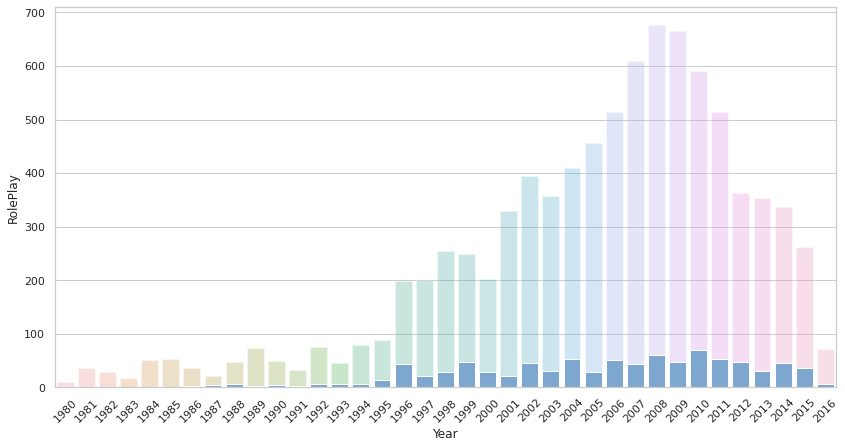

In [24]:
sns.set(rc = {'figure.figsize':(14,7)})
sns.set_style('whitegrid')
sns.barplot(x = yeartotal_sum.index, y = yeartotal_sum['Total'], ci=None, data = yeartotal_sum, dodge = False, alpha = 0.3);
sns.barplot(x = totalsales.index, y = totalsales['RolePlay'], ci=None, data = yeartotal_sum, dodge = False, color = '#6fa8dc');
plt.xticks(rotation=45);

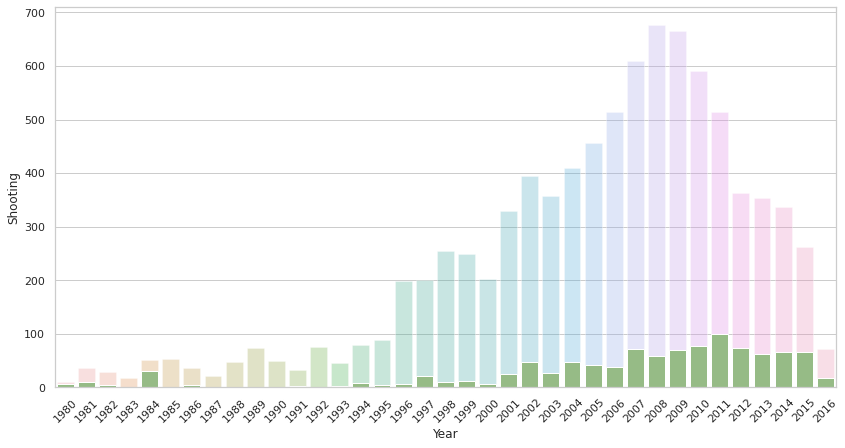

In [25]:
sns.barplot(x = yeartotal_sum.index, y = yeartotal_sum['Total'], ci=None, data = yeartotal_sum, dodge = False, alpha = 0.3);
sns.barplot(x = totalsales.index, y = totalsales['Shooting'], ci=None, data = yeartotal_sum, dodge = False, color = '#93c47d');
plt.xticks(rotation=45);

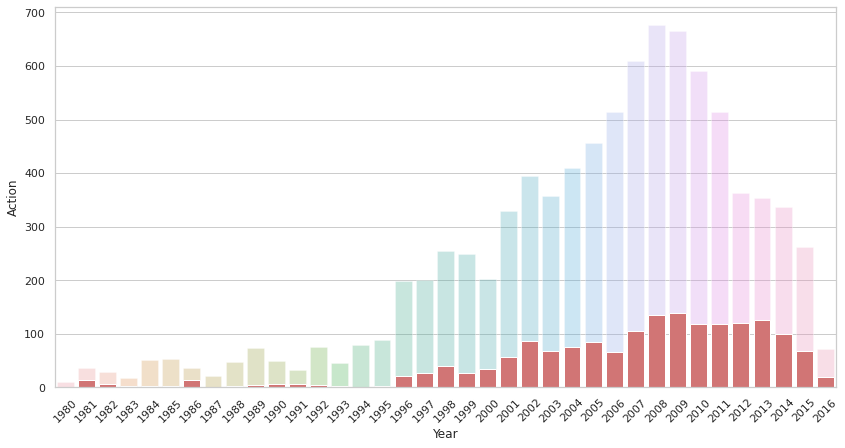

In [26]:
sns.barplot(x = yeartotal_sum.index, y = yeartotal_sum['Total'], ci=None, data = yeartotal_sum, dodge = False, alpha = 0.3);
sns.barplot(x = totalsales.index, y = totalsales['Action'], ci=None, data = yeartotal_sum, dodge = False, color = '#e06666');
plt.xticks(rotation=45);

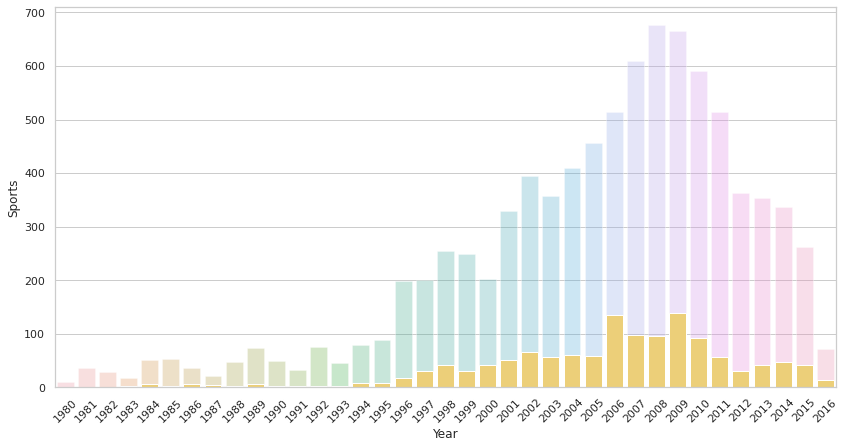

In [27]:
sns.barplot(x = yeartotal_sum.index, y = yeartotal_sum['Total'], ci=None, data = yeartotal_sum, dodge = False, alpha = 0.3);
sns.barplot(x = totalsales.index, y = totalsales['Sports'], ci=None, data = yeartotal_sum, dodge = False, color = '#ffd966');
plt.xticks(rotation=45);

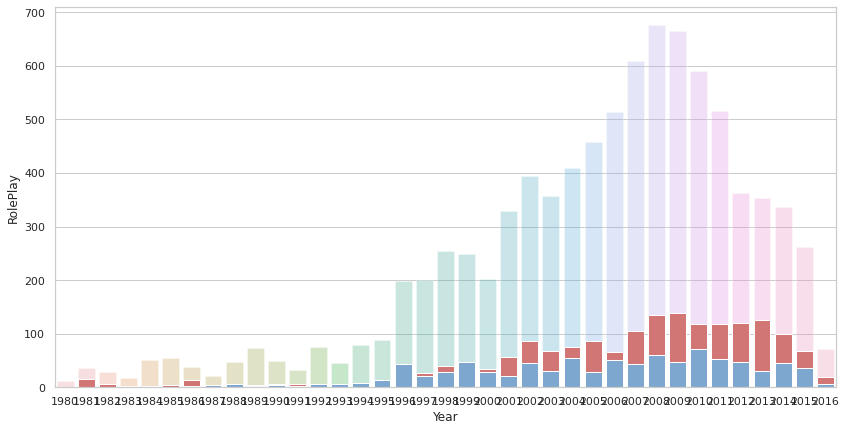

In [28]:
sns.barplot(x = yeartotal_sum.index, y = yeartotal_sum['Total'], ci=None, data = yeartotal_sum, dodge = False, alpha = 0.3)
sns.barplot(x = totalsales.index, y = totalsales['Action'], ci=None, data = yeartotal_sum, dodge = False, color = '#e06666')
sns.barplot(x = totalsales.index, y = totalsales['RolePlay'], ci=None, data = yeartotal_sum, dodge = False, color = '#6fa8dc')

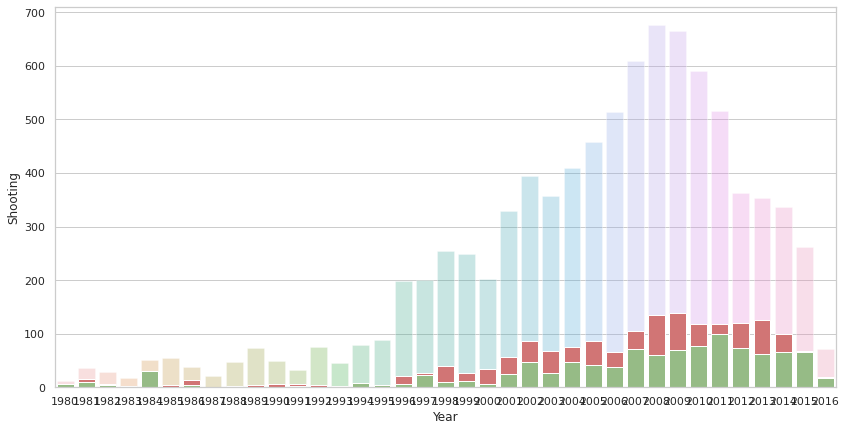

In [29]:
sns.barplot(x = yeartotal_sum.index, y = yeartotal_sum['Total'], ci=None, data = yeartotal_sum, dodge = False, alpha = 0.3)
sns.barplot(x = totalsales.index, y = totalsales['Action'], ci=None, data = yeartotal_sum, dodge = False, color = '#e06666')
sns.barplot(x = totalsales.index, y = totalsales['Shooting'], ci=None, data = yeartotal_sum, dodge = False, color = '#93c47d')

In [56]:
df2.sort_values(by = 'Total Sum', ascending = False, inplace = True)

df2.head(50)

,Name,Genre,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total Sum
2855,Wii Sports,Sports,Wii,2006,41.49,29.02,3.77,8.46,82.74
4113,Super Mario Bros.,Platform,NES,1985,29.08,3.58,6.81,0.77,40.24
12316,Mario Kart Wii,Racing,Wii,2008,15.85,12.88,3.79,3.31,35.83
3288,Wii Sports Resort,Sports,Wii,2009,15.75,11.01,3.28,2.96,33.00
7673,Pokemon Red/Pokemon Blue,Role-Playing,GB,1996,11.27,8.89,10.22,1.00,31.38
1187,Tetris,Puzzle,GB,1989,23.20,2.26,4.22,0.58,30.26
6796,New Super Mario Bros.,Platform,DS,2006,11.38,9.23,6.50,2.90,30.01
2959,Wii Play,Misc,Wii,2006,14.03,9.20,2.93,2.85,29.01
16176,New Super Mario Bros. Wii,Platform,Wii,2009,14.59,7.06,4.70,2.26,28.61
10280,Duck Hunt,Shooter,NES,1984,26.93,0.63,0.28,0.47,28.31


In [31]:
jpsorttop = df2[['Name','Genre','Year','JP_Sales','Total Sum']]

In [32]:
jpsorttop.sort_values(by = 'JP_Sales', ascending = False, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [33]:
jpsorttop.head(10)

,Name,Genre,Year,JP_Sales,Total Sum
7673,Pokemon Red/Pokemon Blue,Role-Playing,1996,10.22,31.38
9233,Pokemon Gold/Pokemon Silver,Role-Playing,1999,7.20,23.09
4113,Super Mario Bros.,Platform,1985,6.81,40.24
6796,New Super Mario Bros.,Platform,2006,6.50,30.01
10345,Pokemon Diamond/Pokemon Pearl,Role-Playing,2006,6.04,18.35
10410,Pokemon Black/Pokemon White,Role-Playing,2010,5.65,15.32
10698,Pokemon Ruby/Pokemon Sapphire,Role-Playing,2002,5.38,15.84
3211,Animal Crossing: Wild World,Simulation,2005,5.33,12.28
503,Brain Age 2: More Training in Minutes a Day,Puzzle,2005,5.32,15.30
1817,Monster Hunter Freedom 3,Role-Playing,2010,4.87,4.87


In [38]:
naall = df2[['Name','Genre','Year','NA_Sales']]
euall = df2[['Name','Genre','Year','EU_Sales']]
jpall = df2[['Name','Genre','Year','JP_Sales']]
otall = df2[['Name','Genre','Year','Other_Sales']]

In [35]:
naall.sort_values(by = 'NA_Sales', ascending = False, inplace = True)

naall.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Name,Genre,Year,NA_Sales
2855,Wii Sports,Sports,2006,41.49
4113,Super Mario Bros.,Platform,1985,29.08
10280,Duck Hunt,Shooter,1984,26.93
1187,Tetris,Puzzle,1989,23.20
12316,Mario Kart Wii,Racing,2008,15.85
3288,Wii Sports Resort,Sports,2009,15.75
4253,Kinect Adventures!,Misc,2010,14.97
16176,New Super Mario Bros. Wii,Platform,2009,14.59
2959,Wii Play,Misc,2006,14.03
12837,Super Mario World,Platform,1990,12.78


In [36]:
euall.sort_values(by = 'EU_Sales', ascending = False, inplace = True)

euall.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Name,Genre,Year,EU_Sales
2855,Wii Sports,Sports,2006,29.02
12316,Mario Kart Wii,Racing,2008,12.88
3288,Wii Sports Resort,Sports,2009,11.01
10914,Nintendogs,Simulation,2005,11.00
3414,Grand Theft Auto V,Action,2013,9.27
12950,Brain Age: Train Your Brain in Minutes a Day,Misc,2005,9.26
6796,New Super Mario Bros.,Platform,2006,9.23
2959,Wii Play,Misc,2006,9.20
7673,Pokemon Red/Pokemon Blue,Role-Playing,1996,8.89
10681,Wii Fit Plus,Sports,2009,8.59


In [39]:
jpall.sort_values(by = 'JP_Sales', ascending = False, inplace = True)

jpall.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Name,Genre,Year,JP_Sales
7673,Pokemon Red/Pokemon Blue,Role-Playing,1996,10.22
9233,Pokemon Gold/Pokemon Silver,Role-Playing,1999,7.20
4113,Super Mario Bros.,Platform,1985,6.81
6796,New Super Mario Bros.,Platform,2006,6.50
10345,Pokemon Diamond/Pokemon Pearl,Role-Playing,2006,6.04
10410,Pokemon Black/Pokemon White,Role-Playing,2010,5.65
10698,Pokemon Ruby/Pokemon Sapphire,Role-Playing,2002,5.38
3211,Animal Crossing: Wild World,Simulation,2005,5.33
503,Brain Age 2: More Training in Minutes a Day,Puzzle,2005,5.32
1817,Monster Hunter Freedom 3,Role-Playing,2010,4.87


In [40]:
otall.sort_values(by = 'Other_Sales', ascending = False, inplace = True)

otall.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Name,Genre,Year,Other_Sales
14355,Grand Theft Auto: San Andreas,Action,2004,10.57
2855,Wii Sports,Sports,2006,8.46
14351,Gran Turismo 4,Racing,2004,7.53
3414,Grand Theft Auto V,Action,2013,4.14
12316,Mario Kart Wii,Racing,2008,3.31
3288,Wii Sports Resort,Sports,2009,2.96
8052,Pro Evolution Soccer 2008,Sports,2007,2.93
6796,New Super Mario Bros.,Platform,2006,2.90
2959,Wii Play,Misc,2006,2.85
10914,Nintendogs,Simulation,2005,2.75


In [49]:
nameyear = df2[['Name','Year','Total Sum']]

In [61]:
nameyear1 = nameyear[(nameyear['Name'].str.contains('Poke')) | (nameyear['Name'].str.contains('Mario'))]

In [62]:
nameyear1.sort_values(by = 'Year', ascending = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
yeartotal_sum.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Year,,,,,
1980,10.13,0.64,0.00,0.11,10.88
1981,33.40,1.96,0.00,0.32,35.68
1982,26.92,1.65,0.00,0.31,28.88
1983,7.76,0.80,8.10,0.14,16.80
1984,33.28,2.10,14.27,0.70,50.35


In [63]:
nameyear1.set_index('Year', inplace = True)

In [65]:
nameyear2 = nameyear1[['Total Sum']]

In [68]:
nameyear3 = yeartotal_sum.join(nameyear2, how = 'outer', rsuffix = '_Name')

In [70]:
nameyear3.fillna(0,inplace = True)

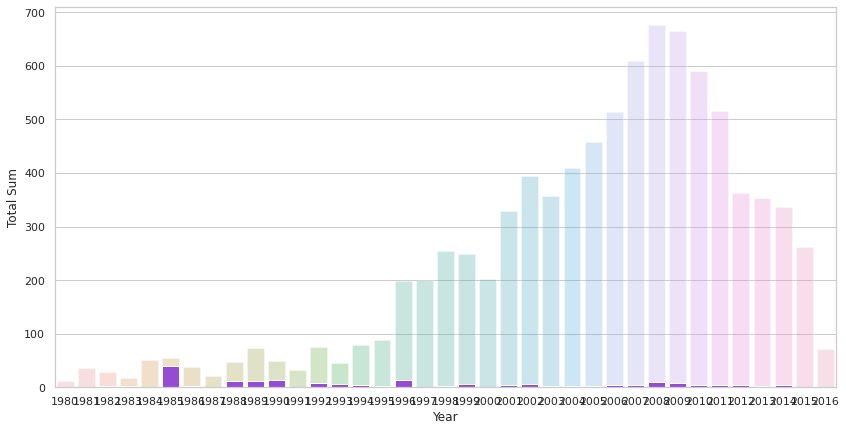

In [72]:
sns.barplot(x = yeartotal_sum.index, y = yeartotal_sum['Total'], ci=None, data = yeartotal_sum, dodge = False, alpha = 0.3);
sns.barplot(x = nameyear3.index, y = nameyear3['Total Sum'], ci=None, data = yeartotal_sum, dodge = False, color = '#9834eb');

In [74]:
nameyear.head(200)

,Name,Year,Total Sum
2855,Wii Sports,2006,82.74
4113,Super Mario Bros.,1985,40.24
12316,Mario Kart Wii,2008,35.83
3288,Wii Sports Resort,2009,33.00
7673,Pokemon Red/Pokemon Blue,1996,31.38
...,...,...,...
10619,Grand Theft Auto V,2014,5.08
12778,Super Mario Bros.,1999,5.07
2254,Resident Evil,1996,5.05
10725,Super Smash Bros. for Wii U and 3DS,2014,5.02
